In [54]:
import torch
import numpy as np
import timeit
from time import time
from scipy.special import expit as sigmoid

from jax import numpy as jnp
from jax import vmap
import jax

from matplotlib import pyplot as plt

In [ ]:
sizes = []
times_np = []
times_jax = []

for s in range(50):
    s = s**2
    sizes.append(s)
    
    vec1 = np.random.uniform(size = (s,s))
    vec2 = np.random.uniform(size = (s,s))

    start = time()
    for i in range(500): np.matmul(vec1, vec2)
    end = time()
    times_np.append(end-start)

    start = time()
    for i in range(500): jnp.matmul(vec1, vec2)
    end = time()
    times_jax.append(end-start)

    print(s)

In [57]:
sizes = np.array(sizes)
times_np = np.array(times_np)
times_jax = np.array(times_jax)

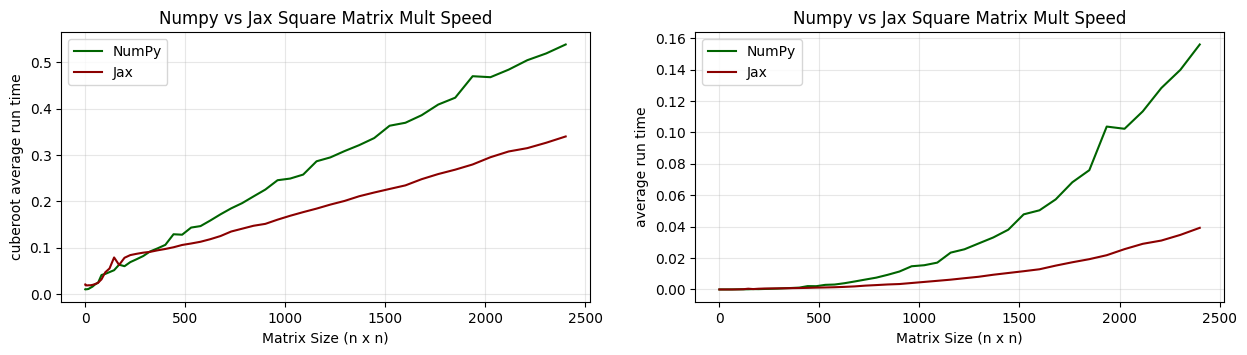

In [89]:
plt.figure(figsize = (15,3.5))

plt.subplot(1,2,1)
plt.plot(sizes, np.cbrt(times_np/500), label = 'NumPy', color = 'darkgreen')
plt.plot(sizes, np.cbrt(times_jax/500), label = 'Jax', color = 'darkred')

plt.legend()
plt.grid(alpha = .3)
plt.title("Numpy vs Jax Square Matrix Mult Speed")
plt.ylabel("cuberoot average run time")
plt.xlabel("Matrix Size (n x n)")


plt.subplot(1,2,2)
plt.plot(sizes, (times_np/500), label = 'NumPy', color = 'darkgreen')
plt.plot(sizes, (times_jax/500), label = 'Jax', color = 'darkred')

plt.legend()
plt.grid(alpha = .3)
plt.title("Numpy vs Jax Square Matrix Mult Speed")
plt.ylabel("average run time")
plt.xlabel("Matrix Size (n x n)")

plt.show()

